### Package Python

In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import os as os
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

### Reading of bases

In [2]:
_path = os.getcwd()
_path

'c:\\git\\Gol_Cases'

In [3]:
_path = os.path.join(_path, 'data', 'Case Analytics-DS.xlsx')
_path

'c:\\git\\Gol_Cases\\data\\Case Analytics-DS.xlsx'

In [4]:
_df = pd.read_excel(io=_path, sheet_name='Dados')
_df.head(2)

,Data Venda,Canal de Venda,Local de Venda,PAX,Monetário Vendido,RPK
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197


In [5]:
_df.columns = _df.columns.str.lower()
_df.columns

Index(['data venda', 'canal de venda', 'local de venda', 'pax',
       'monetário vendido', 'rpk'],
      dtype='object')

In [6]:
_df.columns = _df.columns.str.replace(' ', '_')
_df.columns

Index(['data_venda', 'canal_de_venda', 'local_de_venda', 'pax',
       'monetário_vendido', 'rpk'],
      dtype='object')

In [7]:
_df.describe()

,pax,monetário_vendido,rpk
count,2432.000000,2432.000000,2432.000000
mean,723.002878,24638.740498,66738.389391
std,735.936451,22424.842904,83479.039478
min,18.000000,1041.544400,1127.000000
25%,100.000000,6122.920492,11372.000000
50%,395.500000,17755.421730,33361.500000
75%,1160.250000,35535.323991,95116.750000
max,4705.000000,144890.731053,695824.000000


In [8]:
_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2432 entries, 0 to 2431
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   data_venda         2432 non-null   datetime64[ns]
 1   canal_de_venda     2432 non-null   object        
 2   local_de_venda     2432 non-null   object        
 3   pax                2432 non-null   int64         
 4   monetário_vendido  2432 non-null   float64       
 5   rpk                2432 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 114.1+ KB


In [9]:
_df.dtypes

data_venda           datetime64[ns]
canal_de_venda               object
local_de_venda               object
pax                           int64
monetário_vendido           float64
rpk                           int64
dtype: object

* Checking values nan or nulls

In [10]:
_df.isna().sum()

data_venda           0
canal_de_venda       0
local_de_venda       0
pax                  0
monetário_vendido    0
rpk                  0
dtype: int64

In [11]:
_df.isnull().sum()

data_venda           0
canal_de_venda       0
local_de_venda       0
pax                  0
monetário_vendido    0
rpk                  0
dtype: int64

In [12]:
_df.shape

(2432, 6)

* PAX é o total de passageiros. 
* RPK (Revenue Passenger‐Kilometers) é um indicador diretamente relacionada com o número de PAX.  $ {RPK} = {PAX } * {KM} $

In [13]:
_df = _df.dropna()
_df.head(5)

,data_venda,canal_de_venda,local_de_venda,pax,monetário_vendido,rpk
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197
2,2016-11-01,TeleVenda,Mindscape,19,1041.544400,2425
3,2016-11-01,Porta a Porta,Mindscape,496,15566.340547,53278
4,2016-11-01,TeleVenda,Vast,46,2721.427289,2039


* Adding km

In [14]:
_df['km'] = _df['rpk'] / _df['pax']

1. Faça um ranking para o número total de PAX por dia da semana.

In [15]:
_ranking = _df.groupby(['data_venda'])['pax'].sum().reset_index()
_ranking = _ranking.sort_values('pax').reset_index(drop=True)
_ranking['ranking'] = _ranking.index
_ranking

,data_venda,pax,ranking
0,2016-11-01,4538,0
1,2017-01-16,5751,1
2,2017-02-13,6127,2
3,2017-01-17,6197,3
4,2017-02-14,6298,4
...,...,...,...
147,2017-02-06,23444,147
148,2017-01-10,23460,148
149,2017-01-11,24298,149
150,2016-11-14,24551,150


* Shoing the 5 first and lasts PAX of Ranking.

In [16]:
_ranking.head(5)

,data_venda,pax,ranking
0,2016-11-01,4538,0
1,2017-01-16,5751,1
2,2017-02-13,6127,2
3,2017-01-17,6197,3
4,2017-02-14,6298,4


In [17]:
_ranking.tail(5)

,data_venda,pax,ranking
147,2017-02-06,23444,147
148,2017-01-10,23460,148
149,2017-01-11,24298,149
150,2016-11-14,24551,150
151,2017-01-09,26247,151


* Sum of total of pax

In [18]:
_df['pax'].sum()

1758343

In [19]:
_ranking['pax'].sum()

1758343

In [20]:
_df['rpk'].sum()

162307763

2. Qual a correlação de sábado e domingo somados com o total de RPK?

In [21]:
from datetime import date

def find_day(year,  month, day):

    DIAS = [
        'Segunda-feira',
        'Terça-feira',
        'Quarta-feira',
        'Quinta-feira',
        'Sexta-feira',
        'Sábado',
        'Domingo'
    ]

    data = date(year=year,  month=month, day=day)
    # print(data)

    indice_da_semana = data.weekday()
    # print(indice_da_semana)

    dia_da_semana = DIAS[indice_da_semana]
    # print(dia_da_semana)
    return dia_da_semana

In [22]:
_df['data_venda_str'] = _df['data_venda'].astype(str)
_df.head(5)

,data_venda,canal_de_venda,local_de_venda,pax,monetário_vendido,rpk,km,data_venda_str
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476,115.866667,2016-11-01
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197,157.634615,2016-11-01
2,2016-11-01,TeleVenda,Mindscape,19,1041.544400,2425,127.631579,2016-11-01
3,2016-11-01,Porta a Porta,Mindscape,496,15566.340547,53278,107.415323,2016-11-01
4,2016-11-01,TeleVenda,Vast,46,2721.427289,2039,44.326087,2016-11-01


In [23]:
_df['data_venda_str'].str.split('-', expand=True)

,0,1,2
0,2016,11,01
1,2016,11,01
2,2016,11,01
3,2016,11,01
4,2016,11,01
...,...,...,...
2427,2017,04,01
2428,2017,04,01
2429,2017,04,01
2430,2017,04,01


In [24]:
_df['year'] = _df['data_venda_str'].str.split('-', expand=True)[0]
_df['month'] = _df['data_venda_str'].str.split('-', expand=True)[1]
_df['day'] = _df['data_venda_str'].str.split('-', expand=True)[2]

In [25]:
_df.head()

,data_venda,canal_de_venda,local_de_venda,pax,monetário_vendido,rpk,km,data_venda_str,year,month,day
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476,115.866667,2016-11-01,2016,11,01
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197,157.634615,2016-11-01,2016,11,01
2,2016-11-01,TeleVenda,Mindscape,19,1041.544400,2425,127.631579,2016-11-01,2016,11,01
3,2016-11-01,Porta a Porta,Mindscape,496,15566.340547,53278,107.415323,2016-11-01,2016,11,01
4,2016-11-01,TeleVenda,Vast,46,2721.427289,2039,44.326087,2016-11-01,2016,11,01


In [26]:
_df['dias_da_semana'] = _df.apply( lambda x: find_day(int(x['year']), int(x['month']), int(x['day'])), axis=1 )


In [27]:
_df.head(5)

,data_venda,canal_de_venda,local_de_venda,pax,monetário_vendido,rpk,km,data_venda_str,year,month,day,dias_da_semana
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476,115.866667,2016-11-01,2016,11,01,Terça-feira
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197,157.634615,2016-11-01,2016,11,01,Terça-feira
2,2016-11-01,TeleVenda,Mindscape,19,1041.544400,2425,127.631579,2016-11-01,2016,11,01,Terça-feira
3,2016-11-01,Porta a Porta,Mindscape,496,15566.340547,53278,107.415323,2016-11-01,2016,11,01,Terça-feira
4,2016-11-01,TeleVenda,Vast,46,2721.427289,2039,44.326087,2016-11-01,2016,11,01,Terça-feira


In [43]:
_df2 = _df[['data_venda', 'dias_da_semana', 'rpk']]
_df2 = _df2.groupby(['data_venda']).sum().reset_index()
_df2.head(5)

,data_venda,rpk
0,2016-11-01,367479
1,2016-11-02,837263
2,2016-11-03,1051716
3,2016-11-04,968225
4,2016-11-05,1069765


In [47]:
_df2['data_venda'].min()

Timestamp('2016-11-01 00:00:00')

In [48]:
_df2['data_venda'].max()

Timestamp('2017-04-01 00:00:00')

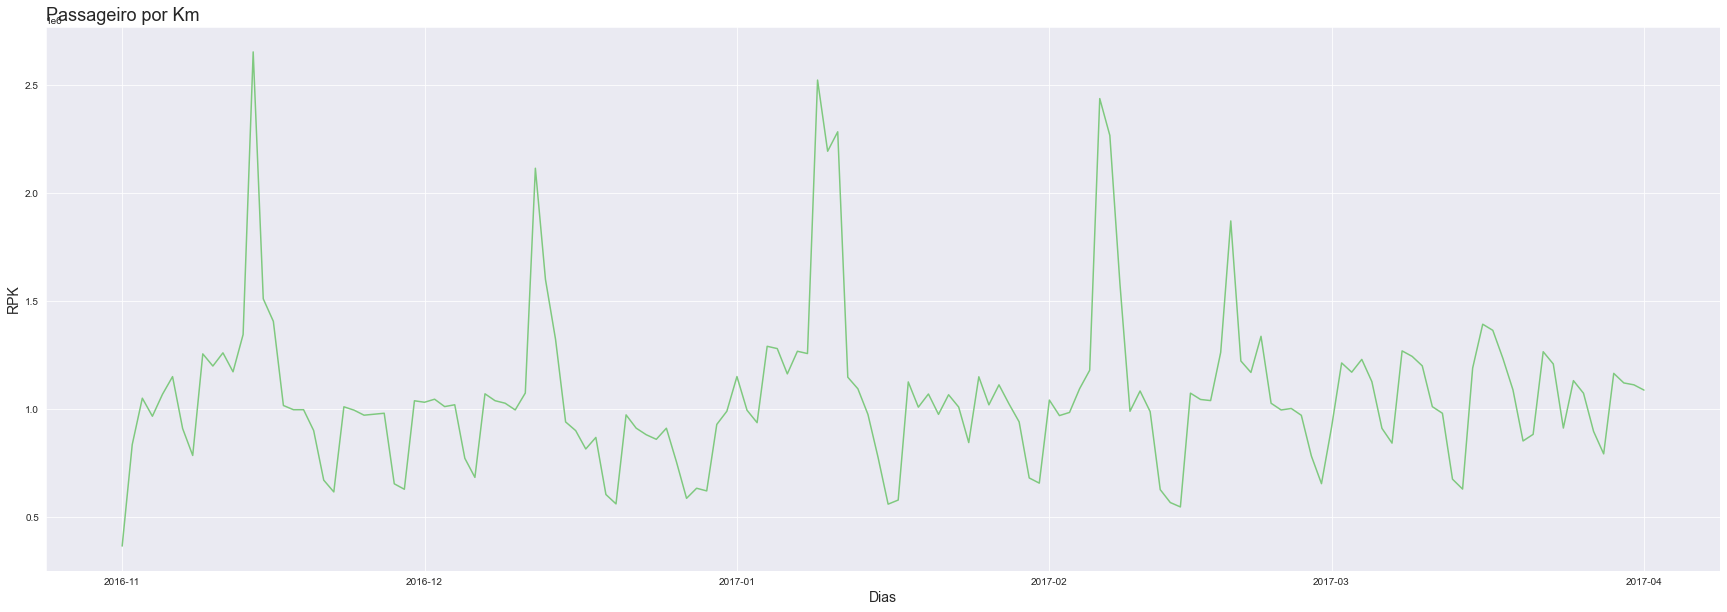

In [51]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'data_venda', y = 'rpk', data = _df2)
ax.figure.set_size_inches(30, 10)
# ax.set(xticks=_df2.data_venda.values)
ax.set_title('Passageiro por Km', loc='left', fontsize=18)
ax.set_xlabel('Dias', fontsize=14)
ax.set_ylabel('RPK', fontsize=14)
ax = ax

In [30]:
_df4 = _df[['data_venda', 'dias_da_semana', 'rpk']]
_df4['order'] = _df4['dias_da_semana'].map({'Segunda-feira':1, 'Terça-feira':2, 'Quarta-feira':3, 'Quinta-feira':4, 'Sexta-feira':5, 'Sábado':6, 'Domingo':7})
_df4 = _df4.groupby(['dias_da_semana']).sum().reset_index()
_df4['order'] = _df4['dias_da_semana'].map({'Segunda-feira':1, 'Terça-feira':2, 'Quarta-feira':3, 'Quinta-feira':4, 'Sexta-feira':5, 'Sábado':6, 'Domingo':7})
_df4 = _df4.sort_values(['order'])
_df4 = _df4.drop(columns='order')
_df4

C:\Users\conta\AppData\Local\Temp/ipykernel_10548/3433924337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df4['order'] = _df4['dias_da_semana'].map({'Segunda-feira':1, 'Terça-feira':2, 'Quarta-feira':3, 'Quinta-feira':4, 'Sexta-feira':5, 'Sábado':6, 'Domingo':7})


,dias_da_semana,rpk
3,Segunda-feira,23275908
6,Terça-feira,20366840
1,Quarta-feira,26263705
2,Quinta-feira,23501102
4,Sexta-feira,23309936
5,Sábado,23201577
0,Domingo,22388695


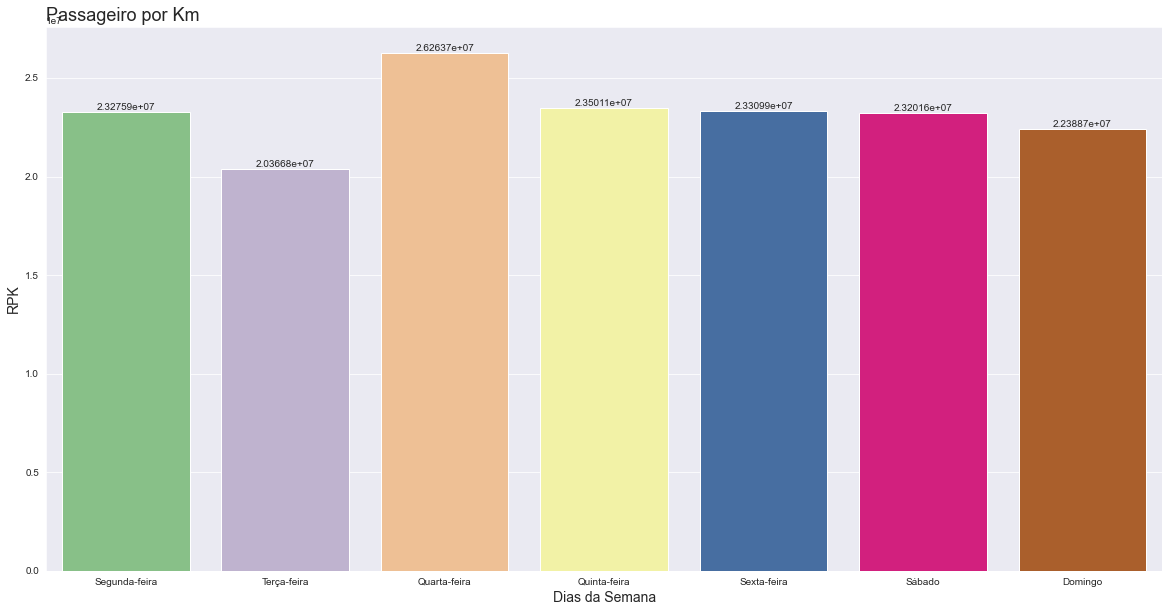

In [31]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.barplot(x = 'dias_da_semana', y = 'rpk', data = _df4)
ax.figure.set_size_inches(20, 10)
ax.set_title('Passageiro por Km', loc='left', fontsize=18)
ax.set_xlabel('Dias da Semana', fontsize=14)
ax.set_ylabel('RPK', fontsize=14)
for i in ax.containers:
    ax.bar_label(i)


In [32]:
_data_prk_sab_dom = _df[(_df['dias_da_semana']=='Sábado') | (_df['dias_da_semana']=='Domingo')]
_data_prk_sab_dom.head(5)

,data_venda,canal_de_venda,local_de_venda,pax,monetário_vendido,rpk,km,data_venda_str,year,month,day,dias_da_semana
64,2016-11-05,TeleVenda,Mindscape,1378,60813.490656,164710,119.528302,2016-11-05,2016,11,05,Sábado
65,2016-11-05,Telégrafo,Ellipsis,42,2695.438460,2399,57.119048,2016-11-05,2016,11,05,Sábado
66,2016-11-05,TeleVenda,Arena,206,15726.530904,32153,156.082524,2016-11-05,2016,11,05,Sábado
67,2016-11-05,Porta a Porta,Vast,1314,30005.759983,61962,47.155251,2016-11-05,2016,11,05,Sábado
68,2016-11-05,Porta a Porta,Mindscape,877,34594.723120,98153,111.919042,2016-11-05,2016,11,05,Sábado


In [33]:
_data_prk_sab_dom.shape

(688, 12)

In [34]:
_data_prk_sab_dom['rpk'].describe()

count       688.000000
mean      66264.930233
std       77345.549978
min        1671.000000
25%       12829.750000
50%       31592.500000
75%       95087.500000
max      474353.000000
Name: rpk, dtype: float64

In [35]:
_df3 = _data_prk_sab_dom.copy()
_df3 = _df3[['data_venda', 'dias_da_semana', 'rpk']]
_df3.head(5)

,data_venda,dias_da_semana,rpk
64,2016-11-05,Sábado,164710
65,2016-11-05,Sábado,2399
66,2016-11-05,Sábado,32153
67,2016-11-05,Sábado,61962
68,2016-11-05,Sábado,98153


In [36]:
_df3 = _df3.groupby(['data_venda']).sum()
_df3.head(5)

,rpk
data_venda,
2016-11-05,1069765
2016-11-06,1151471
2016-11-12,1173772
2016-11-13,1346138
2016-11-19,998433


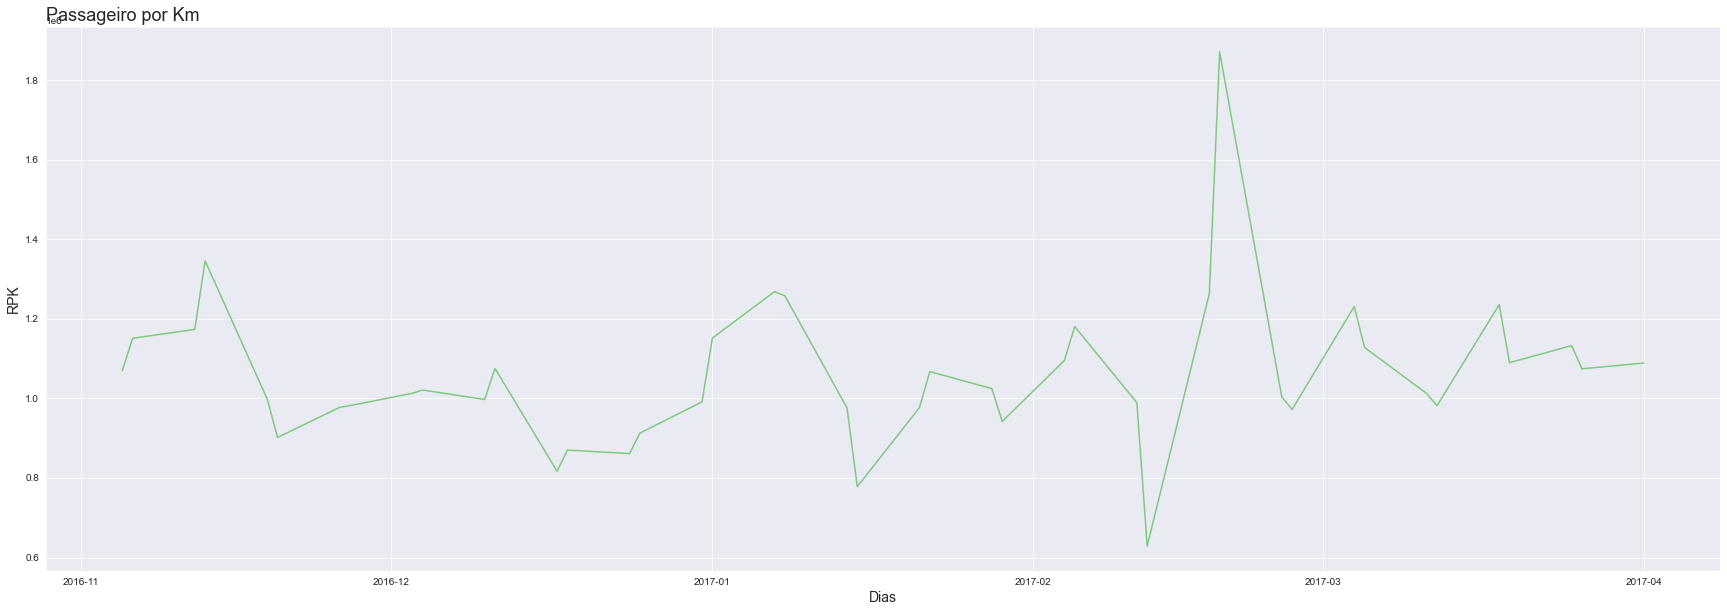

In [37]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'data_venda', y = 'rpk', data = _df3)
ax.figure.set_size_inches(30, 10)
ax.set_title('Passageiro por Km', loc='left', fontsize=18)
ax.set_xlabel('Dias', fontsize=14)
ax.set_ylabel('RPK', fontsize=14)
ax = ax

In [66]:
total_rpk = _df2['rpk'].sum()
total_rpk

162307763

In [67]:
_data_prk_sab_dom = _data_prk_sab_dom['rpk'].sum()
_data_prk_sab_dom

IndexError: invalid index to scalar variable.

In [72]:
_representativeness = round( ( ( _data_prk_sab_dom / total_rpk) ) * 100, 2)
print(f"O RPK de Sábado e Domingo representam {_representativeness}% de um total de {total_rpk:,.2f} do RPK de todos os períodos ")


O RPK de Sábado e Domingo representam 28.09% de um total de 162,307,763.00 do RPK de todos os períodos 


3. Qual a média de ‘Monetário’ por mês por Canal? E a mediana?

In [ ]:
_df_sum_channels = _df.groupby(['data_venda', 'canal_de_venda'])['monetário_vendido'].sum().reset_index()
_df_sum_channels = _df_sum_channels.sort_values(['monetário_vendido']).reset_index(drop=True).rename(columns={'monetário_vendido':'soma_monetário_vendido'})
_df_sum_channels

,data_venda,canal_de_venda,soma_monetário_vendido
0,2017-02-14,Telégrafo,7500.944465
1,2017-03-07,Telégrafo,9887.166630
2,2016-11-01,Telégrafo,10158.006555
3,2016-12-29,Telégrafo,10405.957828
4,2017-01-31,Telégrafo,10664.869419
...,...,...,...
451,2017-02-08,TeleVenda,349715.586496
452,2017-02-05,TeleVenda,358595.468696
453,2017-01-18,TeleVenda,365814.443628
454,2017-02-18,TeleVenda,374294.488479


In [ ]:
_df_mean_channels = _df.groupby(['data_venda', 'canal_de_venda'])['monetário_vendido'].mean().reset_index()
_df_mean_channels = _df_mean_channels.sort_values(['monetário_vendido']).reset_index(drop=True).rename(columns={'monetário_vendido':'media_monetário_vendido'})
_df_mean_channels

,data_venda,canal_de_venda,media_monetário_vendido
0,2017-02-14,Telégrafo,1875.236116
1,2017-03-07,Telégrafo,2471.791657
2,2016-11-01,Telégrafo,2539.501639
3,2016-12-29,Telégrafo,2601.489457
4,2017-01-31,Telégrafo,2666.217355
...,...,...,...
451,2017-02-07,Porta a Porta,57817.974229
452,2016-12-12,Porta a Porta,60264.692703
453,2016-11-15,Porta a Porta,61025.684473
454,2017-02-06,Porta a Porta,62582.661791


In [ ]:
_df_median_channels = _df.groupby(['data_venda', 'canal_de_venda'])['monetário_vendido'].median().reset_index()
_df_median_channels = _df_median_channels.sort_values('monetário_vendido').reset_index(drop=True).rename(columns={'monetário_vendido':'mediana_monetário_vendido'})
_df_median_channels

,data_venda,canal_de_venda,mediana_monetário_vendido
0,2017-02-14,Telégrafo,1855.066440
1,2016-11-29,Telégrafo,1927.050453
2,2017-01-24,Telégrafo,1952.403237
3,2017-03-07,Telégrafo,2131.861597
4,2016-11-22,Telégrafo,2291.569788
...,...,...,...
451,2017-01-10,Porta a Porta,54620.850069
452,2017-02-07,Porta a Porta,54622.131114
453,2017-02-06,Porta a Porta,54958.440086
454,2016-11-15,Porta a Porta,56412.237777


4. Crie um forecast de PAX por ‘Local de Venda’ para os próximos 15 dias a contar da última data de venda. (Aqui a técnica é livre) 
